<a href="https://colab.research.google.com/github/matiendrek/Analisis_Terremoto_Mexico/blob/main/NLP_MATI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Se inicializa el proceso  NLP del dataset

In [41]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from spellchecker import SpellChecker
from unidecode import unidecode



In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!pip install unidecode

In [44]:
pip install pyspellchecker

In [45]:
!pip install autocorrect

In [46]:
!pip install demoji

In [47]:
!pip install spacy-download


In [48]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 61.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [49]:
# Este código en Python utiliza la biblioteca pandas para leer un
#  archivo CSV llamado "NLP_Analisis_de_emociones.csv" ubicado
#  en la ruta "/content/drive/MyDrive/Colab Notebooks/"
#  y carga su contenido en un DataFrame de pandas llamado "df".

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP_Analisis_de_emociones.csv")

In [50]:
# Visualizo el dataframe para ver la cantidad de columnas,
#  filas, y el contenido de las mismas.

df

,coms,sent
0,"> PD: que insoportables las focas camporistas aplaudidoras, de lejos lo peor de hoy, no lo dejaban hablar a Milei y alargaron el discurso innecesariamente (además de la loca que no para de gritar).\n\nBoludo, terrible. Me senté a ver el final y esto de los 10 puntos duró una eternidad. Era más aplauso que discurso en un momento.",NEG
1,"Lo de las jubilaciones de privilegio es para adelante, o sea de Milei hoy por hoy lo alcanzaria a Milei y su vice nomas.",NEU
2,"Como anti Milei que soy, admito:\n\n- Es loable cualquier medida que reduzca o elimine los curros de la politica\n\n- Me gusta la democratización de los sindicatos\n\nPodría haber ido mas allá, por todo, y tocar las dietas y viaticos de los diputados y senadores. No digo ""que ganen lo mismo que un docente"" (Del Caño, etc.), pero si darle algun marco regulatorio a la baja.",NEU
3,Siempre dos metros adelante Milei,POS
4,adhiero malisimo de una hora y media que duro podria haberlo terminado de leer en media hora todo bien que seas del partido y te guste milei pero tampoco para andar como zombie descerebrado a aplaudirle por cada cosa que dice,NEG
...,...,...
1496,"Es que fue así. No hay un ganador como tal, pero al ir al debate cada uno tiene una finalidad. Massa consiguio todos los videos para tik tok que quizo y asi reafirmar los votos antimilei, y los del kirchnerismo por haberlos representado bien. Y era la oportunidad de Milei de atraer votos nuevos pero medio debate solo le fue funcional a Massa y en la otra mitad no hizo mucho.\n\nEl único que cumplio con su meta fue Massa",NEU
1497,"Pobre Milei. Admito que me dio algo de penita. Lo hizo demasiado bien, no es para nada su zona de confort. Por algo a Massa lo votan a pesar de ser la causa del problema. Es un politico de alta estirpe. Milei no lo es, y le costó hacerse entender",POS
1498,Con este gobierno Clarin se convirtió en la izquierda diario y LN+ debe ser el diario que mas fakes le hizo a Milei.\n\nAdemás salvo los +50 quien mierda lee el diario hoy en día? Dejaron de ser medios de información para ser medios de opinión sesgada,NEG
1499,Lo tranquilo que me pone Milei cuando empieza a hablar. Solito se va enterrando.,NEG


In [51]:
# El método info() en Python, cuando se aplica a un DataFrame de Pandas (df),
# proporciona una visión general concisa del DataFrame,
# incluyendo la cantidad de filas y columnas,
# los tipos de datos de cada columna y la cantidad de valores no nulos en cada columna.
# Es una herramienta útil para comprender la estructura y la composición de un DataFrame en Pandas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   coms    1501 non-null   object
 1   sent    1501 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [52]:
# Muestro los valores unicos de la columna sent

df['sent'].unique()


array(['NEG', 'NEU', 'POS'], dtype=object)

In [53]:
# Muestro los valores unicos de la columna sent

df['sent'].nunique()

3

In [54]:
# Cuenta la cantidad de valores de cada categoría en la columna "sent"
frecuencias = df['sent'].value_counts()

# Imprime las frecuencias
print(frecuencias)

sent
NEG    597
NEU    560
POS    344
Name: count, dtype: int64


***El código de Python*** "nlp = spacy.load('es_core_news_sm')" ***sirve para cargar un modelo de lenguaje pre-entrenado para español de la biblioteca spaCy.*** ***Este modelo te permite realizar diversas tareas de procesamiento de lenguaje natural (PLN) en español, como:***

***Tokenización:*** Divide el texto en unidades más pequeñas, como palabras, puntuación y símbolos.*

***Lematización:*** Reduce las palabras a su forma base o lema.

***Etiquetado morfológico:*** Identifica la categoría gramatical de cada palabra (sustantivo, verbo, adjetivo, etc.).

***Análisis sintáctico:*** Determina la estructura de la oración y la relación entre las palabras.

***Reconocimiento de entidades nombradas:*** Identifica nombres propios de personas, lugares, organizaciones, etc.

***Análisis de sentimientos:*** Predice el sentimiento o la emoción expresada en un texto.

***El modelo es_core_news_sm es un modelo pequeño, lo que significa que es rápido y eficiente, pero puede no ser tan preciso como los modelos más grandes. Si necesitas mayor precisión, puedes usar un modelo como es_core_news_md o es_core_news_lg.***

In [55]:
nlp = spacy.load('es_core_news_sm')

In [56]:
def clean_text(text):
    doc = nlp(text)
    clean_text = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(clean_text)

# Aplico la función a la columna de coms del df
df['coms'] = df['coms'].apply(clean_text)

In [57]:
df.head()

,coms,sent
0,> pd insoportable foca camporista aplaudidora lejos dejar hablar milei alargar discurso innecesariamente loca gritar \n\n boludo terrible sentar 10 punto durar eternidad aplauso discursir momento,NEG
1,jubilación privilegio milei alcanzariar milei vice noma,NEU
2,anti milei admito \n\n loable medida reducir eliminir curro politica \n\n gustar democratización sindicato \n\n ir allá tocar dieta viatico diputado senador decir ganar docente caño etc. dar él algun marco regulatorio baja,NEU
3,metro milei,POS
4,adhiero malisimo hora medio duro haber él terminar leer medio hora sea partido gustar milei andar zombie descerebrado aplaudir él cosa,NEG


In [58]:
# Función para eliminar emojis y otros caracteres no deseados de un texto
def limpiar_texto(texto):
    # Patrón de emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticonos generales
                               u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
                               u"\U0001F680-\U0001F6FF"  # símbolos de transporte y mapa
                               u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
                               u"\U00002500-\U00002BEF"  # caracteres chinos comunes
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # selectores de estilo
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    # Eliminar emojis y otros caracteres no deseados
    return emoji_pattern.sub(r'', texto)

# Aplicar la función limpiar_texto a la columna "coms"
df["coms"] = df["coms"].apply(limpiar_texto)

# Mostrar el DataFrame actualizado
print(df)

                                                                                                                                                                                                                                coms  \
0                                > pd insoportable foca camporista aplaudidora lejos dejar hablar milei alargar discurso innecesariamente loca gritar \n\n boludo terrible sentar 10 punto durar eternidad aplauso discursir momento   
1                                                                                                                                                                            jubilación privilegio milei alcanzariar milei vice noma   
2     anti milei admito \n\n loable medida reducir eliminir curro politica \n\n gustar democratización sindicato \n\n ir allá tocar dieta viatico diputado senador decir ganar docente caño etc. dar él algun marco regulatorio baja   
3                                                                       

In [59]:
def eliminar_url(texto):
    # Patrón para encontrar URLs en el texto
    patron_url = r'https?://\S+'
    # Reemplazar todas las coincidencias con una cadena vacía
    texto_sin_url = re.sub(patron_url, '', texto)
    return texto_sin_url

# Aplicar la función eliminar_url a la columna 'coms' del DataFrame df
df['coms'] = df['coms'].apply(eliminar_url)

In [60]:
def eliminar_numeros(texto):
    return ''.join(caracter for caracter in texto if not caracter.isdigit())

# Aplicando al DataFrame
df['coms'] = df['coms'].apply(eliminar_numeros)

In [61]:
def corregir_errores(texto):
    palabras = texto.split()  # Dividir el texto en palabras
    texto_corregido = []  # Lista para almacenar las palabras corregidas
    for palabra in palabras:
        # Si la palabra no es correcta, obtener la sugerencia más probable
        palabra_corregida = corrector.correction(palabra)
        if palabra_corregida is not None:
            texto_corregido.append(palabra_corregida)  # Agregar la palabra corregida a la lista
    return ' '.join(texto_corregido)  # Unir las palabras corregidas en un texto nuevamente

In [62]:
# Define una función para eliminar caracteres no deseados
def eliminar_caracteres(cadena):
    caracteres_no_deseados = ['\n', '<', '>']
    for caracter in caracteres_no_deseados:
        cadena = cadena.replace(caracter, '')
    return cadena

# Aplica la función a cada elemento de la columna 'coms'
df['coms'] = df['coms'].apply(eliminar_caracteres)

In [63]:
# Suponiendo que ya tienes el DataFrame 'df' creado

# Aplicar la función unidecode a la columna 'coms'
df['coms'] = df['coms'].apply(unidecode)

In [64]:
pd.options.display.max_colwidth = 10000
df.head(5)

,coms,sent
0,pd insoportable foca camporista aplaudidora lejos dejar hablar milei alargar discurso innecesariamente loca gritar boludo terrible sentar punto durar eternidad aplauso discursir momento,NEG
1,jubilacion privilegio milei alcanzariar milei vice noma,NEU
2,anti milei admito loable medida reducir eliminir curro politica gustar democratizacion sindicato ir alla tocar dieta viatico diputado senador decir ganar docente cano etc. dar el algun marco regulatorio baja,NEU
3,metro milei,POS
4,adhiero malisimo hora medio duro haber el terminar leer medio hora sea partido gustar milei andar zombie descerebrado aplaudir el cosa,NEG


# Desarrollo del modelo

In [78]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.1 MB/s eta 0:00:00


In [73]:
# Importo las librerias necesarias

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
X = vectorizer.fit_transform(df['coms'].values.tolist()).toarray()
y = LabelEncoder().fit_transform(df['sent'].values)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Training Performance")
    print(classification_report(y_train,y_pred_tr))
    print(" ")
    print("Testing Performance")
    print(classification_report(y_test,y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.4g',
            xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

In [70]:
# Calcular los valores únicos
valores_unicos, conteos = np.unique(y_test, return_counts=True)

for valor, conteo in zip(valores_unicos, conteos):
    print(f"El valor {valor} aparece {conteo} veces en el array.")

El valor 0 aparece 128 veces en el array.
El valor 1 aparece 104 veces en el array.
El valor 2 aparece 69 veces en el array.


Training Performance
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       469
           1       0.83      0.83      0.83       456
           2       1.00      0.21      0.35       275

    accuracy                           0.74      1200
   macro avg       0.83      0.67      0.65      1200
weighted avg       0.80      0.74      0.70      1200

 
Testing Performance
              precision    recall  f1-score   support

           0       0.48      0.80      0.60       128
           1       0.44      0.35      0.39       104
           2       0.17      0.01      0.03        69

    accuracy                           0.47       301
   macro avg       0.36      0.39      0.34       301
weighted avg       0.40      0.47      0.40       301



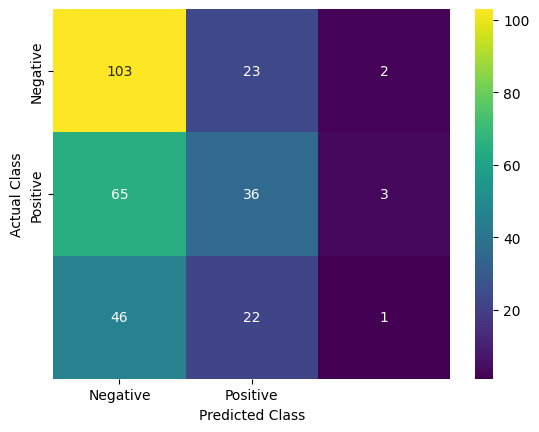

In [71]:
model = MultinomialNB()
model_train(model, X_train, X_test, y_train, y_test)

Training Performance
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       469
           1       0.86      0.93      0.89       456
           2       0.97      0.66      0.78       275

    accuracy                           0.87      1200
   macro avg       0.89      0.84      0.86      1200
weighted avg       0.88      0.87      0.87      1200

 
Testing Performance
              precision    recall  f1-score   support

           0       0.54      0.63      0.58       128
           1       0.43      0.54      0.48       104
           2       0.32      0.10      0.15        69

    accuracy                           0.48       301
   macro avg       0.43      0.42      0.41       301
weighted avg       0.45      0.48      0.45       301



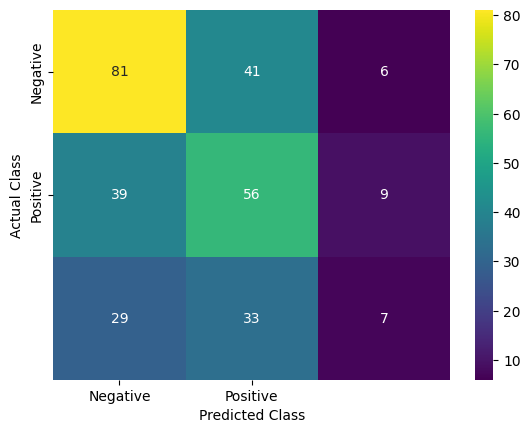

In [72]:
model = LogisticRegression(max_iter=1000)
model_train(model, X_train, X_test, y_train, y_test)

In [74]:
X = df.coms.copy()
y = df.sent.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defino los parámetros para el vectorizador TF-IDF
tfidf_params = {
    'max_features': 1500,
    'ngram_range': (1,3),
    'min_df': 2,
    'max_df': 0.8
}

# Crear un vectorizador TF-IDF con los parámetros
vectorizer = TfidfVectorizer(**tfidf_params)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
from sklearn.svm import SVC
clf = SVC(random_state=0, C=0.5)
clf.fit(X_train, y_train)
from sklearn.metrics import classification_report

print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         NEG       0.52      0.99      0.69       471
         NEU       0.96      0.64      0.77       439
         POS       1.00      0.04      0.08       290

    accuracy                           0.64      1200
   macro avg       0.83      0.56      0.51      1200
weighted avg       0.80      0.64      0.57      1200

              precision    recall  f1-score   support

         NEG       0.43      0.97      0.60       126
         NEU       0.53      0.07      0.13       121
         POS       0.00      0.00      0.00        54

    accuracy                           0.44       301
   macro avg       0.32      0.35      0.24       301
weighted avg       0.39      0.44      0.30       301



In [75]:
X = df.coms.copy()
y = df.sent.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizar los comentarios usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#modelo de SVM
svm_classifier = SVC(kernel='rbf',C=10, gamma=1.5,random_state=0)
svm_classifier.fit(X_train_tfidf, y_train)

#predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = svm_classifier.predict(X_train_tfidf)
y_test_pred = svm_classifier.predict(X_test_tfidf)

#reportes de clasificación
print("Reporte de clasificación en entrenamiento:")
print(classification_report(y_train, y_train_pred))
print("\nReporte de clasificación en prueba:")
print(classification_report(y_test, y_test_pred))

Reporte de clasificación en entrenamiento:
              precision    recall  f1-score   support

         NEG       1.00      1.00      1.00       469
         NEU       0.99      1.00      1.00       456
         POS       1.00      0.99      0.99       275

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Reporte de clasificación en prueba:
              precision    recall  f1-score   support

         NEG       0.51      0.67      0.58       128
         NEU       0.40      0.48      0.44       104
         POS       0.29      0.03      0.05        69

    accuracy                           0.46       301
   macro avg       0.40      0.39      0.36       301
weighted avg       0.42      0.46      0.41       301



In [79]:
import praw
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [80]:
# Dividir los datos en características (comentarios) y etiquetas (sentimientos)

comentarios = df['coms'].values
sentimientos = df['sent'].values

# Tokenización y preprocesamiento de datos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comentarios)
sequences = tokenizer.texts_to_sequences(comentarios)
max_seq_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_seq_len, padding='post')

# Convertir etiquetas de sentimiento a números
label_dict = {'NEG': 0, 'NEU': 1, 'POS': 2}
sentimientos_numericos = np.array([label_dict[sent] for sent in sentimientos])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentimientos_numericos, test_size=0.2, random_state=42)

# Definir modelo de RNN
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/8
38/38 [==============================] - 13s 233ms/step - loss: 1.0809 - accuracy: 0.3542 - val_loss: 1.0703 - val_accuracy: 0.4252
Epoch 2/8
38/38 [==============================] - 15s 393ms/step - loss: 1.0741 - accuracy: 0.3775 - val_loss: 1.0705 - val_accuracy: 0.4252
Epoch 3/8
38/38 [==============================] - 15s 388ms/step - loss: 1.0772 - accuracy: 0.3717 - val_loss: 1.0694 - val_accuracy: 0.4252
Epoch 4/8
38/38 [==============================] - 10s 263ms/step - loss: 1.0759 - accuracy: 0.3908 - val_loss: 1.0728 - val_accuracy: 0.4252
Epoch 5/8
38/38 [==============================] - 9s 230ms/step - loss: 1.0737 - accuracy: 0.3592 - val_loss: 1.0731 - val_accuracy: 0.3455
Epoch 6/8
38/38 [==============================] - 10s 267ms/step - loss: 1.0745 - accuracy: 0.3883 - val_loss: 1.0720 - val_accuracy: 0.4252
Epoch 7/8
38/38 [==============================] - 8s 224ms/step - loss: 1.0738 - accuracy: 0.3917 - val_loss: 1.0713 - val_accuracy: 0.4252
Epoch 8/

In [81]:
X = df.coms.copy()
y = df.sent.copy()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=98, random_state=42, max_depth=6)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=98, random_state=42)

In [82]:
predictions = rf_classifier.predict(X_test)

# Evaluación del rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report

print("Exactitud del modelo:", accuracy_score(y_test, predictions))
print("Informe de clasificación:")
print(classification_report(y_test, predictions,zero_division=1))

Exactitud del modelo: 0.47840531561461797
Informe de clasificación:
              precision    recall  f1-score   support

         NEG       0.50      0.67      0.58       128
         NEU       0.45      0.56      0.50       104
         POS       1.00      0.00      0.00        69

    accuracy                           0.48       301
   macro avg       0.65      0.41      0.36       301
weighted avg       0.60      0.48      0.42       301



In [83]:
!pip install optuna
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define una función objetivo que Optuna intentará minimizar.
def objective(trial):
    # Define los hiperparámetros a optimizar
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)

    # Crea un modelo con los hiperparámetros sugeridos
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Divide los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrena el modelo
    model.fit(X_train, y_train)

    # Calcula la precisión del modelo en el conjunto de prueba
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Devuelve la precisión, Optuna intentará minimizar esto
    return 1.0 - accuracy

# Crear los datos (X, y) - Asume que ya están definidos

# Crea un estudio Optuna
study = optuna.create_study(direction='minimize')

# Ejecuta la optimización (puede llevar un tiempo)
study.optimize(objective, n_trials=100)

# Obtiene los mejores hiperparámetros encontrados
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Obtiene la mejor precisión
best_accuracy = 1.0 - study.best_value
print("Mejor precisión:", best_accuracy)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.4 MB/s eta 0:00:00


[I 2024-04-08 04:42:09,643] A new study created in memory with name: no-name-3b4e42e4-64f1-4217-859e-12793710ca13
[I 2024-04-08 04:42:09,742] Trial 0 finished with value: 0.5182724252491695 and parameters: {'n_estimators': 34, 'max_depth': 30}. Best is trial 0 with value: 0.5182724252491695.
[I 2024-04-08 04:42:09,962] Trial 1 finished with value: 0.5681063122923589 and parameters: {'n_estimators': 98, 'max_depth': 19}. Best is trial 0 with value: 0.5182724252491695.
[I 2024-04-08 04:42:10,027] Trial 2 finished with value: 0.521594684385382 and parameters: {'n_estimators': 40, 'max_depth': 6}. Best is trial 0 with value: 0.5182724252491695.
[I 2024-04-08 04:42:10,144] Trial 3 finished with value: 0.521594684385382 and parameters: {'n_estimators': 75, 'max_depth': 5}. Best is trial 0 with value: 0.5182724252491695.
[I 2024-04-08 04:42:10,255] Trial 4 finished with value: 0.5382059800664452 and parameters: {'n_estimators': 62, 'max_depth': 11}. Best is trial 0 with value: 0.5182724252491

Mejores hiperparámetros: {'n_estimators': 79, 'max_depth': 4}
Mejor precisión: 0.49169435215946844
